<a href="https://colab.research.google.com/github/OlgaAcosta/Project2_DataAnalytics_Henry/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hago la conexión con Google Drive

In [333]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **EDA**


## OBJETIVO GENERAL
De acuerdo al ETL realizado previamente, el *objetivo general* de este proyecto se orienta a **la expansión y mejora de la cobertura de red  en Argentina**.
Por lo tanto, el énfasis está en el *alcance* y la *calidad* de la red.
Los objetivos específicos se desarrollarán conforme se vaya realizando el análisis exploratorio de datos.

 Importo las librerías

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Obtengo los datos

In [335]:
# Internet
internet_rangos_vel_prov = pd.read_csv('/content/drive/MyDrive/HENRY/PI_DA/POST_ETL_Datasets/internet_rangos_vel_prov.csv', sep =",")
internet_prov = pd.read_csv('/content/drive/MyDrive/HENRY/PI_DA/POST_ETL_Datasets/internet_prov.csv', sep =",")
internet_loc = pd.read_csv('/content/drive/MyDrive/HENRY/PI_DA/POST_ETL_Datasets/internet_loc.csv', sep =",")
internet_ingresos = pd.read_csv('/content/drive/MyDrive/HENRY/PI_DA/POST_ETL_Datasets/internet_ingresos.csv', sep =",")

# Telefonía Fija
telf_fija_ingresos = pd.read_csv("/content/drive/MyDrive/HENRY/PI_DA/POST_ETL_Datasets/telf_fija_ingresos.csv", sep =",")
telf_fija_acc_prov = pd.read_csv("/content/drive/MyDrive/HENRY/PI_DA/POST_ETL_Datasets/telf_fija_acc_prov.csv",sep =",")

# Telefonía móvil
telf_movil_acc_total = pd.read_csv("/content/drive/MyDrive/HENRY/PI_DA/POST_ETL_Datasets/telf_movil_acc_total.csv", sep =",")
telf_movil_portab = pd.read_csv("/content/drive/MyDrive/HENRY/PI_DA/POST_ETL_Datasets/telf_movil_portab.csv", sep =",")
telf_movil_ingresos = pd.read_csv("/content/drive/MyDrive/HENRY/PI_DA/POST_ETL_Datasets/telf_movil_ingresos.csv", sep =",")


* Dataframe shape
* head y tail
* dtypes
* describe

## DF *internet_rangos_vel_prov*

In [336]:
print(internet_rangos_vel_prov.info())
print(internet_rangos_vel_prov.describe())
internet_rangos_vel_prov.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  792 non-null    int64  
 1   Trimestre            792 non-null    int64  
 2   Provincia            792 non-null    object 
 3   HASTA 512 kbps       792 non-null    float64
 4   + 512 Kbps - 1 Mbps  792 non-null    float64
 5   + 1 Mbps - 6 Mbps    792 non-null    float64
 6   + 6 Mbps - 10 Mbps   792 non-null    float64
 7   + 10 Mbps - 20 Mbps  792 non-null    float64
 8   + 20 Mbps - 30 Mbps  792 non-null    float64
 9   + 30 Mbps            792 non-null    float64
 10  OTROS                786 non-null    float64
 11  Total                792 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 74.4+ KB
None
               Año   Trimestre  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
count   792.000000  792.000000      792.000000          

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,1,Buenos Aires,31591.0,30056.0,313382.0,321756.0,290127.0,161183.0,3381049.0,26280.0,4555424.0
1,2022,1,Capital Federal,527.0,5575.0,39918.0,77390.0,61053.0,43289.0,1188072.0,1717.0,1417541.0
2,2022,1,Catamarca,71.0,456.0,4386.0,7009.0,8773.0,3761.0,35715.0,2207.0,62378.0
3,2022,1,Chaco,461.0,1099.0,16888.0,21235.0,20898.0,13012.0,62946.0,7580.0,144119.0
4,2022,1,Chubut,113.0,1677.0,61369.0,31856.0,33080.0,13871.0,14055.0,15607.0,171628.0


### Primeras impresiones del DF *internet_rangos_vel_prov*:

Este dataframe muestra la cantidad de conexiones por rango de velocidad de internet en las diferentes provincias de Argentina a lo largo de los años y trimestres. A partir de lo observado, obtengo las siguientes impresiones:

Temporales:
* Información a partir del primer timestre del 2014 hasta el primer trimestre del 2022.
* Sería interesante observar las tendencias temporales apartir de las columnas *Año* y *Trimestre*, y ver cómo ha evolucionado la velocidad de conexión a lo largo del tiempo, para detectar patrones o tendencias de mejora en la velocidad de conexión.

Rango de velocidades:
* La mayor cantidad promedio de conexiones se ubica en el rango de velocidad *+ 1 Mbps - 6 Mbps*, y la menor en el rango de *Hasta 512 kbps*. Sin embargo, la desviación stándar es alta, por lo que conviene revisar la mediana de cada rango de velocidad y ordenarlas en orden descendente.
* Conviene también observar la distribución de las velocidades de conexión en diferentes rangos. Los rangos más comunes parecen  ser aquellos con velocidades entre 1 Mbps y 6 Mbps, seguidos de los rangos entre 512 Kbps y 1 Mbps (esto se deriva del promedio *mean*).

Provincias:
* Se puede identificar las provincias con mayores accesos a los rangos de velocidades más rápidas, para obtener información sobre el estado actual de las conexiones de alta velocidad en los diferentes sectores. Para tal comparación, conviene obtener un porcentaje en realación a la cantidad de población por provincia, dato que se puede obtener de otra de las tablas (*Idea: scatter*).

* A partir de lo anterior, se puede detectar la desigualdad en la velocidad de conexión partir de la variabilidad entre las provincias. Podría haber una brecha significativa en la calidad de la conexión a internet entre diferentes áreas geográficas  (Idea: pairplot con hue).

* Se puede identificar valores atípicos o extremos en la cantidad de conexiones por Provincia y velocidades de conexión. Estos valores podrían indicar problemas técnicos o áreas con conexiones de baja calidad que requieren atención (*Idea: scatter o joinplot).

Filtro los datos solo a partir del 2018  porque me interesa el progreso de los cinco último años; compruebo si la desviación estándar se mantiene .

In [337]:
internet_rangos_vel_prov_2018= internet_rangos_vel_prov[internet_rangos_vel_prov['Año'] >= 2018]
internet_rangos_vel_prov_2018.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,408.000000,408.000000,408.000000,408.000000,4.080000e+02,408.000000,408.000000,408.000000,4.080000e+02,402.000000,4.080000e+02
mean,2019.647059,2.411765,2860.698529,4184.973039,1.157573e+05,42689.718137,45685.607843,36247.953431,1.269423e+05,8143.417910,3.823922e+05
std,1.235408,1.142031,19297.378655,10735.866876,2.378257e+05,62619.804807,100543.465951,102110.619773,4.062080e+05,13009.298763,8.030055e+05
min,2018.000000,1.000000,6.000000,0.000000,3.576000e+03,2.000000,0.000000,0.000000,0.000000e+00,-1945.000000,2.138200e+04
25%,2019.000000,1.000000,39.000000,109.000000,3.046600e+04,5297.000000,5686.500000,563.500000,8.742500e+02,380.000000,7.934550e+04
50%,2020.000000,2.000000,71.000000,810.000000,4.468050e+04,16685.000000,15212.500000,4295.500000,9.364000e+03,4416.000000,1.190100e+05
75%,2021.000000,3.000000,188.000000,3118.000000,8.212675e+04,52472.000000,31115.750000,15982.750000,4.365775e+04,9708.000000,2.049095e+05
max,2022.000000,4.000000,238920.000000,81354.000000,1.459443e+06,331292.000000,886678.000000,949093.000000,3.381049e+06,120464.000000,4.555424e+06


De acuerdo a lo anterior, la desviación estándar se mantiene e incluso aumenta, por lo que la mediana vendría a ser una medida más representativa que el promedio.

## Evolución de conexiones a internet por rango de velocidad

* Genero un gráfico de líneas para evaluar el progreso del total de conexiones a internet por rango de velocidad y por trimestre:

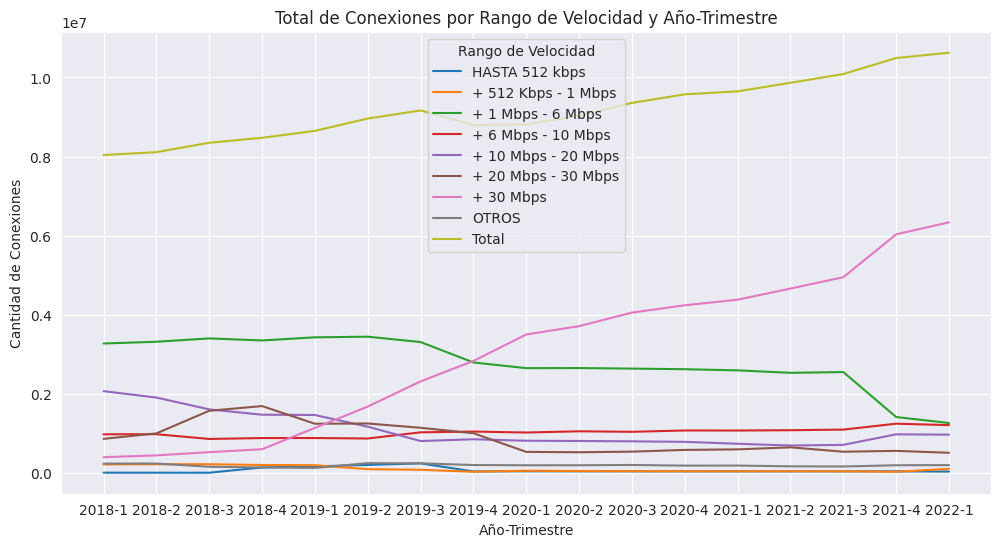

In [338]:
# Calcula la cantidad de las conexiones agrupando por año y rango de velocidad
conexiones_por_año = internet_rangos_vel_prov_2018.groupby(['Año', "Trimestre"]).sum()

# Reinicia el índice para tener los años como columna
conexiones_por_año = conexiones_por_año.reset_index()

# Convierte el DataFrame en un formato largo para poder utilizar 'hue' en el gráfico de líneas
sumas_largo = pd.melt(conexiones_por_año, id_vars=['Año', "Trimestre"], var_name='Rango de Velocidad', value_name='Cantidad de Conexiones')

# Creo una nueva columna que concatene el año con el trimestre:
sumas_largo["Año_Trim"]= sumas_largo["Año"].astype(str) + "-" + sumas_largo["Trimestre"].astype(str)

# Crea el gráfico de líneas con 'hue' para los rangos de velocidad
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

sns.lineplot(data=sumas_largo, x="Año_Trim", y='Cantidad de Conexiones', hue='Rango de Velocidad')

# Establece los títulos y etiquetas de los ejes
plt.title('Total de Conexiones por Rango de Velocidad y Año-Trimestre')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de Conexiones')

# Muestra el gráfico
plt.show()

* Genero un gráfico de líneas para evaluar el progreso de la mediana (representativa de las provincias) de conexiones a internet por rango de velocidad y por trimestre:

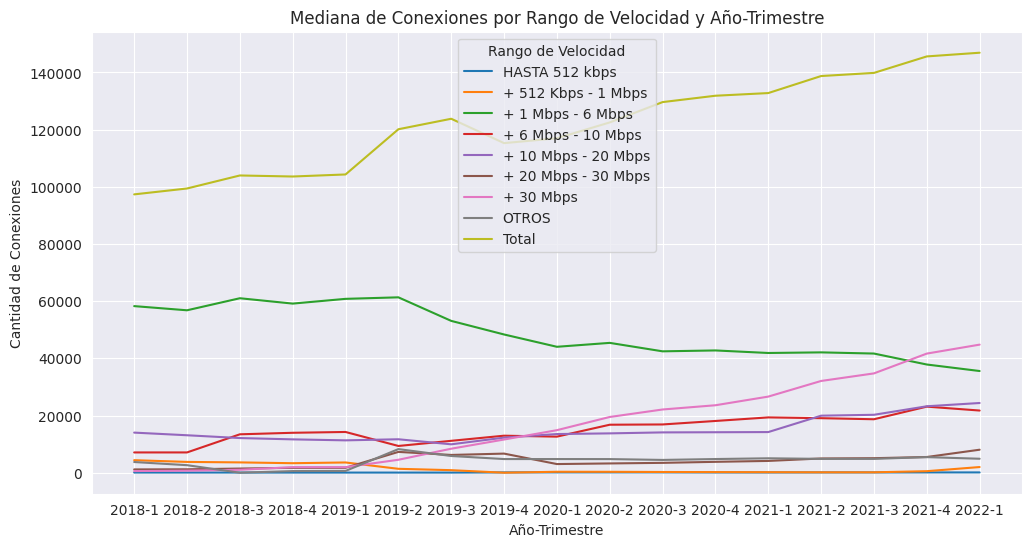

In [339]:
# Calcula la cantidad de las conexiones agrupando por año y rango de velocidad
conexiones_por_año = internet_rangos_vel_prov_2018.groupby(['Año', "Trimestre"]).median()

# Reinicia el índice para tener los años como columna
conexiones_por_año = conexiones_por_año.reset_index()

# Convierte el DataFrame en un formato largo para poder utilizar 'hue' en el gráfico de líneas
sumas_largo = pd.melt(conexiones_por_año, id_vars=['Año', "Trimestre"], var_name='Rango de Velocidad', value_name='Mediana de Conexiones')

# Creo una nueva columna que concatene el año con el trimestre:
sumas_largo["Año_Trim"]= sumas_largo["Año"].astype(str) + "-" + sumas_largo["Trimestre"].astype(str)

# Crea el gráfico de líneas con 'hue' para los rangos de velocidad
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

sns.lineplot(data=sumas_largo, x="Año_Trim", y='Mediana de Conexiones', hue='Rango de Velocidad')

# Establece los títulos y etiquetas de los ejes
plt.title('Mediana de Conexiones por Rango de Velocidad y Año-Trimestre')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de Conexiones')

# Muestra el gráfico
plt.show()



### Análisis de la evolución de conexiones por rango de velocidad y periodo (año-trimestre)

De lo anterior se desprende que:
* El rango de velocidad prreminente en los años más antiguos ha sido el de 1 a 6 mbps.
* El rango de velocidad  + 30mbps era muy bajo antes, pero ha ido aumentando hasta superar (tanto en total como en mediana) al rango de 1 a 6 mbps.
* Se puede observar una relación inversamente proporcional entre el aumento y descenso de estas dos velocidades: parece que las conexiones perdidas para la velocidad 1 a 6 mbps son las mismas que se aumentan en la velocidad de + 30 mbps.
* El cruce y revés de estas dos velocidades en el gráfico que representa las conexiones total se da en el periodo de 2019-4; sin embargo, en el gráfico que representa las medianas de la cantidad de conexiones el cruce y revés se da en el periodo 2021-4 (aproximadamente), casi dos años después. Esto sugiere que, si bien la cantidad total de conexiones de más de 30 mbps ha aumentado desde el 2019, este aumento a nivel de cada provincia se ha generalizado recién dos años después.
* En general, hay una tendencia de aumento de conexiones para la velocidad de + 30 mbps, así como en las del rango de 6 Mbps - 10 Mbps y 10 Mbps - 20 Mbps en menor proporción,  mientras que las conexiones de las otras velocidades se mantienen lineales en su mayoría.
* En conclusión, hay un crecimiento en las conexiones a partir de 6 mbps a más.

## Progreso de conexiones a internet por Provincia

Filtro los datos para hacer una comparativa solo del primer trimestre de cada año:

In [340]:
# Filtro por primer trimestre
internet_rangos_vel_prov_pri_Trim = internet_rangos_vel_prov_2018[internet_rangos_vel_prov_2018['Trimestre'] == 1]

# Creo la columna "Periodo"
internet_rangos_vel_prov_pri_Trim['Periodo'] = internet_rangos_vel_prov_pri_Trim['Año'].astype(str) + '-' + internet_rangos_vel_prov_pri_Trim['Trimestre'].astype(str)

# Calculo la suma de conexiones por provincia y periodo
conexiones_totales_provincia = internet_rangos_vel_prov_pri_Trim.groupby(['Provincia', "Año",'Periodo'])['Total'].sum().reset_index()

conexiones_totales_provincia

,Provincia,Año,Periodo,Total
0,Buenos Aires,2018,2018-1,3471700.0
1,Buenos Aires,2019,2019-1,3732709.0
2,Buenos Aires,2020,2020-1,3718747.0
3,Buenos Aires,2021,2021-1,4060002.0
4,Buenos Aires,2022,2022-1,4555424.0
...,...,...,...,...
115,Tucumán,2018,2018-1,167984.0
116,Tucumán,2019,2019-1,172217.0
117,Tucumán,2020,2020-1,200449.0
118,Tucumán,2021,2021-1,231912.0


Creo el gráfico del aumento anual de conexiones por provincia:

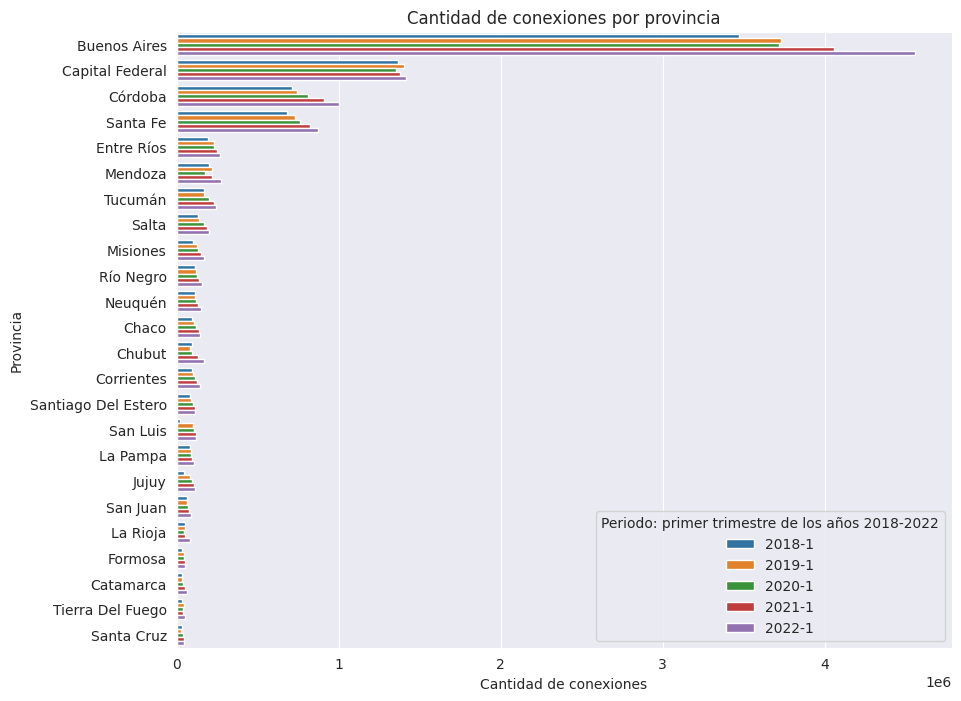

In [341]:
# Creo una lista de las provincias por la cantidad total de conexiones en orden descendente
provincias_ordenadas = conexiones_totales_provincia.groupby('Provincia')['Total'].sum().sort_values(ascending=False).index.tolist()

# Crear el gráfico de barras con hue
plt.figure(figsize=(10, 8))
sns.barplot(x='Total', y='Provincia', hue='Periodo', data=conexiones_totales_provincia, order=provincias_ordenadas)

# Configurar las etiquetas
plt.xlabel('Cantidad de conexiones')
plt.ylabel('Provincia')
plt.title('Cantidad de conexiones por provincia')
plt.legend(title='Periodo: primer trimestre de los años 2018-2022')

# Mostrar el gráfico
plt.show()



Ahora, haré el mismo gráfico pero tomando el porcentaje de conexiones respecto a la población de cada provincia.
La cantidad de población la obtengo de la proyección realizada por [INDEC - Argentina.](https://www.indec.gob.ar/indec/web/Nivel4-Tema-2-24-85)

In [342]:
# Importo el dataset que contiene la población:
provincia_poblacion= pd.read_excel("/content/drive/MyDrive/HENRY/PI_DA/Data_Poblacion/poblacion_provincia_2018_2022.xlsx")
print(provincia_poblacion.info())
provincia_poblacion.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Año        120 non-null    int64 
 1   Provincia  120 non-null    object
 2   Poblacion  120 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ KB
None


,Año,Provincia,Poblacion
0,2018,Buenos Aires,17196396
1,2019,Buenos Aires,17370144
2,2020,Buenos Aires,17541141
3,2021,Buenos Aires,17709598
4,2022,Buenos Aires,17875743


In [343]:
# Reviso cómo están escritas las provincias:
provincia_poblacion.Provincia.value_counts()

Buenos Aires           5
Capital Federal        5
Tucuman                5
Santiago Del Estero    5
Santa Fe               5
Santa Cruz             5
San Luis               5
San Juan               5
Salta                  5
Rio Negro              5
Neuquen                5
Misiones               5
Mendoza                5
La Rioja               5
La Pampa               5
Jujuy                  5
Formosa                5
Entre Rios             5
Chubut                 5
Chaco                  5
Corrientes             5
Cordoba                5
Catamarca              5
Tierra Del Fuego       5
Name: Provincia, dtype: int64

Debo normalizar primero los nombres de las provincias de "conexiones_totales_provincia" para que coincidan con los de *provincia_poblacion*

In [344]:
# Reemplazo las letras "í" con tilde por la letra "i" sin tilde en la columna 'Provincia'del df conexiones_totales_provincia:
conexiones_totales_provincia['Provincia'] = conexiones_totales_provincia['Provincia'].str.replace('í', 'i')
conexiones_totales_provincia['Provincia'] = conexiones_totales_provincia['Provincia'].str.replace('ó', 'o')
conexiones_totales_provincia['Provincia'] = conexiones_totales_provincia['Provincia'].str.replace('é', 'e')
conexiones_totales_provincia['Provincia'] = conexiones_totales_provincia['Provincia'].str.replace('á', 'a')

conexiones_totales_provincia.Provincia.value_counts()

Buenos Aires           5
Capital Federal        5
Tierra Del Fuego       5
Santiago Del Estero    5
Santa Fe               5
Santa Cruz             5
San Luis               5
San Juan               5
Salta                  5
Rio Negro              5
Neuquen                5
Misiones               5
Mendoza                5
La Rioja               5
La Pampa               5
Jujuy                  5
Formosa                5
Entre Rios             5
Cordoba                5
Corrientes             5
Chubut                 5
Chaco                  5
Catamarca              5
Tucuman                5
Name: Provincia, dtype: int64

Ahora, realizo la unión de los dataframes para obtener la provincia, periodo, total de conexiones y población en una misma tabla, y obtengo la columna del porcentaje:

In [345]:
# Realizo el merge entre los DataFrames:
conexiones_totales_provincia = pd.merge(conexiones_totales_provincia, provincia_poblacion, on=['Provincia', "Año"])

conexiones_totales_provincia.head()


,Provincia,Año,Periodo,Total,Poblacion
0,Buenos Aires,2018,2018-1,3471700.0,17196396
1,Buenos Aires,2019,2019-1,3732709.0,17370144
2,Buenos Aires,2020,2020-1,3718747.0,17541141
3,Buenos Aires,2021,2021-1,4060002.0,17709598
4,Buenos Aires,2022,2022-1,4555424.0,17875743


In [346]:
# Creo la columna con el porcentaje del número de conexiones respecto a la población:
conexiones_totales_provincia["Porcentaje_conexiones"]= conexiones_totales_provincia["Total"]/conexiones_totales_provincia["Poblacion"]
conexiones_totales_provincia.head()

,Provincia,Año,Periodo,Total,Poblacion,Porcentaje_conexiones
0,Buenos Aires,2018,2018-1,3471700.0,17196396,0.201885
1,Buenos Aires,2019,2019-1,3732709.0,17370144,0.214892
2,Buenos Aires,2020,2020-1,3718747.0,17541141,0.212001
3,Buenos Aires,2021,2021-1,4060002.0,17709598,0.229254
4,Buenos Aires,2022,2022-1,4555424.0,17875743,0.254838


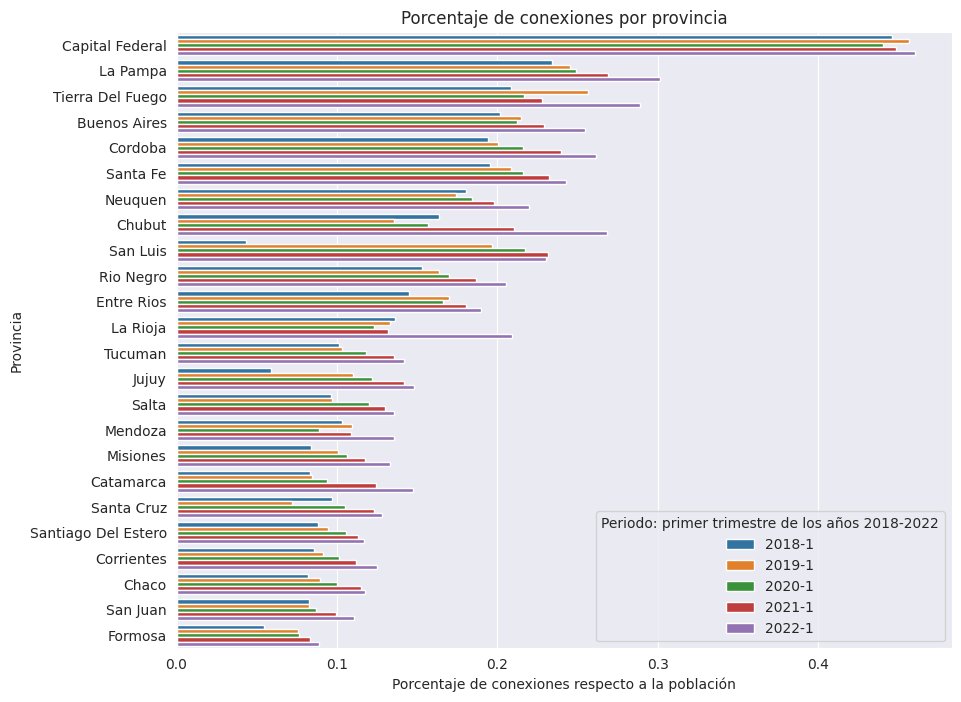

In [347]:
# Creo una lista de las provincias por la cantidad total de conexiones en orden descendente
provincias_ordenadas = conexiones_totales_provincia.groupby('Provincia')['Porcentaje_conexiones'].sum().sort_values(ascending=False).index.tolist()

# Crear el gráfico de barras con hue
plt.figure(figsize=(10, 8))
sns.barplot(x='Porcentaje_conexiones', y='Provincia', hue='Periodo', data=conexiones_totales_provincia, order=provincias_ordenadas)

# Configurar las etiquetas
plt.xlabel('Porcentaje de conexiones respecto a la población')
plt.ylabel('Provincia')
plt.title('Porcentaje de conexiones por provincia')
plt.legend(title='Periodo: primer trimestre de los años 2018-2022')

# Mostrar el gráfico
plt.show()

### Análisis de la evolución del porcentaje de conexiones respecto a la población por provincia y periodo (primer trimestre de cada año)

De los gráficos anteriores se desprende que:

* Todas las provincias han aumentado su cantidad de conexiones en los últimos cinco años, siendo Buenos Aires la que ha tenido un mayor aumento.
* En el primer gráfico se ve una gran diferencia entre las conexiones en cada periodo en Buenos Aires respecto a las demás provincias; sin embargo, el segundo gráfico refleja mejor el crecimiento de las conexiones ya que toma en cuenta la proporción de estas respecto a la población de cada una, lo que permite observar un escenario más fiel a la realidad.
* Capital Federal supera en porcentaje de conexiones a todas las demás, llegando casi al 50% (por cada 10 personas, hay 5 conexiones) ; sin embargo, su incremento no ha sido tan relevante en los últimos cinco años.
* Las provincias que más han crecido en porcentaje respecto al año anterior son La Pampa, Tierra de Fuego, Chubut y La Rioja.
* Las provincias en donde el porcentaje de conexiones respecto a su población es menor al 15% son Tucumán, Jujuy, Salta, Mendoza, Misiones, Catamarca, Santa Cruz, Santiago Del Estero, Corrientes, Chaco, San Juan y Formosa. Esto quiere decir que por cada 10 personas hay máximo 1.5 conexiones.
* De acuerdo a lo anterior, estas regiones son un foco al cual dirigir esfuerzos para incrementar la accesibilidad a internet. Conviene analizar más de cerca su crecimiento porcentual año a año:





## Crecimiento porcentual de conexiones a internet en las provincias más bajas

In [348]:
# Filtro por las provincias más bajas:
lista_provincias_bajas=["Tucuman", "Jujuy", "Salta", "Mendoza", "Misiones", "Catamarca", "Santa Cruz", "Santiago Del Estero", "Corrientes", "Chaco", "San Juan", "Formosa"]
conexiones_totales_provincia_bajas =conexiones_totales_provincia[conexiones_totales_provincia["Provincia"].isin(lista_provincias_bajas)]
conexiones_totales_provincia_bajas.Provincia.unique()

array(['Catamarca', 'Chaco', 'Corrientes', 'Formosa', 'Jujuy', 'Mendoza',
       'Misiones', 'Salta', 'San Juan', 'Santa Cruz',
       'Santiago Del Estero', 'Tucuman'], dtype=object)

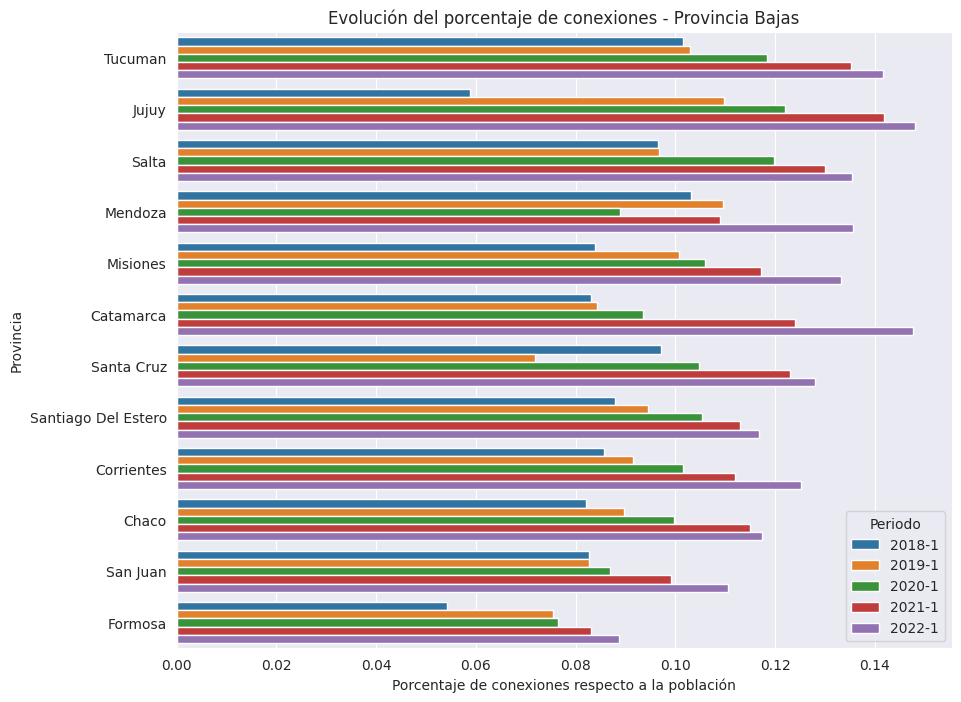

In [349]:
# Creo una lista de las provincias por la cantidad total de conexiones en orden descendente
provincias_ordenadas = conexiones_totales_provincia_bajas.groupby('Provincia')['Porcentaje_conexiones'].sum().sort_values(ascending=False).index.tolist()

# Crear el gráfico de barras con hue
plt.figure(figsize=(10, 8))
sns.barplot(x='Porcentaje_conexiones', y='Provincia', hue='Periodo', data=conexiones_totales_provincia_bajas, order=provincias_ordenadas)

# Configurar las etiquetas
plt.xlabel('Porcentaje de conexiones respecto a la población')
plt.ylabel('Provincia')
plt.title('Evolución del porcentaje de conexiones - Provincia Bajas')
plt.legend(title="Periodo")


# Mostrar el gráfico
plt.show()

Para visualizar la tendencia de crecimiento, grafico el crecimiento porcentual total entre el periodo 2018-1 y 2022-1 por provincia:

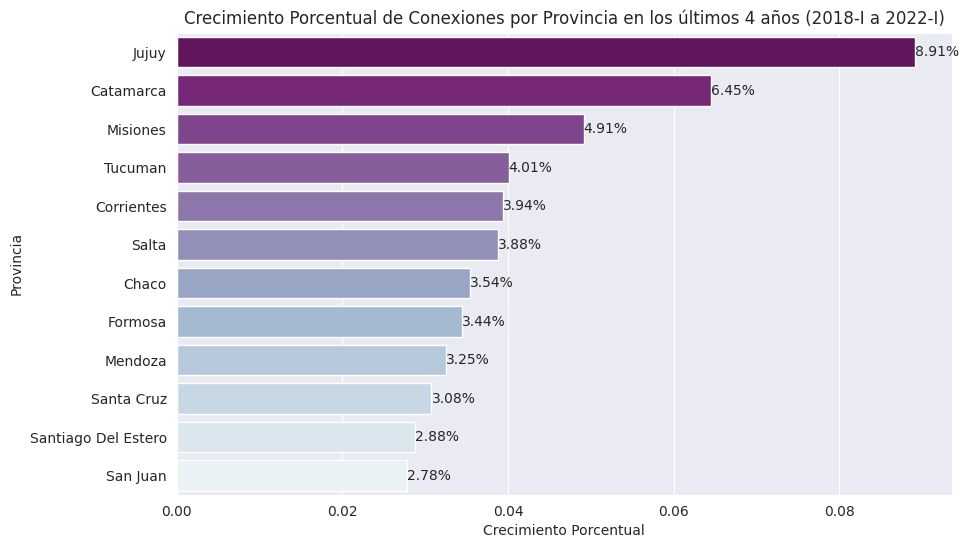

In [350]:
# Filtro los datos para los periodos 2018-I y 2022-I
df_filtrado = conexiones_totales_provincia_bajas[(conexiones_totales_provincia_bajas['Periodo'] == '2018-1') |
                                                 (conexiones_totales_provincia_bajas['Periodo'] == '2022-1')]

# Pivoteo la tabla
df_pivot = df_filtrado.pivot(index='Provincia', columns='Periodo', values='Porcentaje_conexiones')


# Calculo el crecimiento porcentual
df_pivot['Crecimiento'] = df_pivot['2022-1'] - df_pivot['2018-1']

# Ordeno por el crecimiento de forma descendente
df_pivot.sort_values('Crecimiento', ascending=False, inplace=True)

# Crear una paleta de colores personalizada
colores = sns.color_palette("BuPu", n_colors=12)[::-1]  # Ajusta el número de colores según tu preferencia

# Creo el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Crecimiento', y=df_pivot.index, data=df_pivot, orient='h', palette=colores)

# Configuro las etiquetas
plt.xlabel('Crecimiento Porcentual')
plt.ylabel('Provincia')
plt.title('Crecimiento Porcentual de Conexiones por Provincia en los últimos 4 años (2018-I a 2022-I)')

# Muestro los valores en cada barra
for i, value in enumerate(df_pivot['Crecimiento']):
    plt.text(value, i, f'{value*100:.2f}%', ha='left', va='center')

plt.show()

In [351]:
# Reviso los porcentajes actuales:

kpi1_data = df_pivot

kpi1_data

Periodo,2018-1,2022-1,Crecimiento
Provincia,,,
Jujuy,0.058885,0.147960,0.089075
Catamarca,0.083128,0.147649,0.064520
Misiones,0.083964,0.133109,0.049146
Tucuman,0.101538,0.141619,0.040081
Corrientes,0.085752,0.125112,0.039360
Salta,0.096506,0.135342,0.038836
Chaco,0.081986,0.117386,0.035400
Formosa,0.054308,0.088738,0.034431
Mendoza,0.103077,0.135555,0.032478


Obtengo el promedio del crecimiento porcentual de las provincias:

In [352]:
promedio=df_pivot["Crecimiento"].mean()*100
print(f"El promedio del crecimiento porcentual en la provincias más bajas es {round(promedio,2)} %")

El promedio del crecimiento porcentual en la provincias más bajas es 4.26 %


### Análisis del crecimiento porcentual de conexiones en las provincias con menor porcentaje

* De acuerdo al primer gráfico *Porcentaje de conexiones - Provincia Bajas*, se desprende que la mayoría de las provincias (porcentaje menor al 15%) presentan un incremento porcentual año tras año en los últimos cuatro años, a excepción de Mendoza y Santa Cruz, que disminuyeron entre los años 2019 a 2020 y 2018 a 2019 respectivamente.
* Por otro lado, todas las provincias presentan un incremento porcentual entre el primer y último periodo evaluado (2018-1 a 2022-1).
* Todas las provincias tienen al menos un salto evidente de crecimiento entre un periodo y otro.
* La provincia que más ha crecido en porcentaje de conexiones respecto a su población en los último 4 años es Jujuy, teniendo un crecimiento de casi el 9% (aproximadamente 2.2% anual).
* La provincia que menos crecimiento porcentual presenta en los últimos 4 años es San Juan , siendo su crecimiento de 2.78% (aproximadamente 0.7% anual).
* El promedio del crecimiento porcentual en los últimos 4 años es del 4.26% (aproximadamente 1.1% anual).

### **Conclusión**
A partir de lo anterior, propongo:
* Dirigir el enfoque en el aumento de conexiones por habitante en las provincias *Tucumán, Jujuy, Salta, Mendoza, Misiones, Catamarca, Santa Cruz, Santiago Del Estero, Corrientes, Chaco, San Juan* y *Formosa* (lo que repercute directamente en el aspecto "*alcance*" del objetivo general).
* Ya que el promedio de crecimiento porcentual es de 4.26% y hay periodos entre los cuales todas las provincias han presentado al menos una pendiente alta de crecimiento entre un periodo y otro, defino un **aumento objetivo** del 6% en los próximos 4 años (2022 - 2026); es decir un **crecimiento del 1.5% anual**.  






#### 💡 **KPI**: *Incremento del porcentaje de conexiones totales por población*

> Incrementar en 1.5% anual las conexiones por población en las provincias Tucumán, Jujuy, Salta, Mendoza, Misiones, Catamarca, Santa Cruz, Santiago Del Estero, Corrientes, Chaco, San Juan y Formosa en los próximos cuatro años.

>> * Métrica: aumento en el número de conexiones totales dividido por la población total de cada provincia, expresado en porcentaje.

>> * Aspecto del objetivo general: alcance de red de internet.

>> * Meta:

>>> 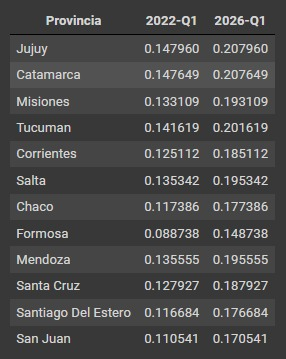

## DF *internet_prov*

In [353]:
print(internet_prov.info())
print(internet_prov.describe())
internet_prov.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           792 non-null    int64  
 1   Trimestre                     792 non-null    int64  
 2   Provincia                     792 non-null    object 
 3   ADSL                          792 non-null    float64
 4   Cablemodem                    792 non-null    float64
 5   Fibra óptica                  792 non-null    float64
 6   Wireless                      792 non-null    float64
 7   Otros                         792 non-null    float64
 8   Total                         792 non-null    float64
 9   Banda ancha fija              792 non-null    float64
 10  Dial up                       792 non-null    float64
 11  Accesos por cada 100 hogares  792 non-null    float64
 12  Mbps (Media de bajada)        792 non-null    float64
dtypes: fl

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Banda ancha fija,Dial up,Accesos por cada 100 hogares,Mbps (Media de bajada)
0,2022,1,Buenos Aires,392045.0,2728865.0,1242121.0,125521.0,66872.0,4555424.0,4549131.0,6293.0,7608.0,63.0
1,2022,1,Capital Federal,102290.0,1217225.0,62308.0,5784.0,29934.0,1417541.0,1415378.0,2163.0,1118.0,88.0
2,2022,1,Catamarca,14181.0,15517.0,29118.0,1328.0,2234.0,62378.0,62377.0,1.0,5821.0,51.0
3,2022,1,Chaco,32391.0,64546.0,36662.0,8164.0,2356.0,144119.0,144114.0,5.0,4406.0,46.0
4,2022,1,Chubut,44133.0,66667.0,9184.0,30592.0,21052.0,171628.0,170701.0,927.0,8805.0,13.0


### Primeras impresiones del DF *internet_prov*:

Este dataframe muestra la cantidad de conexiones a internet por tecnología y Banda Ancha / Dial up en las diferentes provincias de Argentina a lo largo de los años y trimestres. Además, da información sobre la velocidad media en cada provincia por periodo. A partir de lo observado, obtengo las siguientes impresiones:

* No presenta nulos.
*
* De acuerdo al promedio, *Cable Modem* parece tener la mayor cantidad de accesos. Mientras *Otros* y *Wireless* , parecen tener la menor cantidad.
* Además, de acuerdo al promedio, *Banda ancha* supera en gran medida a *Dial Up*.
* La desviación estándar en estos campos es muy elevevada, por lo que probablemente no represente de manera fiel la realidad; convendría, por lo tanto, hacer uso de la mediana.
* En el caso de *velocidad media de bajada*, la desviación estándar no es muy alta, por lo que el promedio tiene más confiabilidad. Así, éste refleja que la velocidad de bajada promedio es de 12mbps.
* En este mismo campo, la variabilidad entre los tres primero percentiles no es muy alta; sin embargo, entre el tercer percentil y el máximo la variabilidad aumenta. Convendría revisar la distribución de este mismo indicador en los útlimos años y en las diferentes provincias.

Filtro los datos solo a partir del 2018  porque me interesa el progreso de los cinco último años; reviso si la desviación estándar se mantiene .

In [354]:
internet_prov_2018= internet_prov[internet_prov['Año'] >= 2018]
internet_prov_2018.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Banda ancha fija,Dial up,Accesos por cada 100 hogares,Mbps (Media de bajada)
count,408.000000,408.000000,4.080000e+02,4.080000e+02,4.080000e+02,408.000000,408.000000,4.080000e+02,4.080000e+02,408.000000,408.000000,408.000000
mean,2019.647059,2.411765,1.092621e+05,2.078839e+05,4.132098e+04,15121.428922,8803.696078,3.823922e+05,3.817197e+05,672.475490,5094.644608,19.617647
std,1.235408,1.142031,2.034822e+05,4.867516e+05,1.414933e+05,21734.435183,12121.447538,8.028570e+05,8.014393e+05,1686.011661,2389.630248,14.423428
min,2018.000000,1.000000,7.987000e+03,3.146000e+03,0.000000e+00,0.000000,29.000000,2.139600e+04,2.109600e+04,0.000000,37.000000,4.000000
25%,2019.000000,1.000000,2.172450e+04,2.261275e+04,7.802500e+02,2171.000000,1004.250000,7.934550e+04,7.857275e+04,3.000000,3625.750000,9.000000
50%,2020.000000,2.000000,4.605950e+04,5.359450e+04,5.663500e+03,6770.000000,3071.000000,1.188575e+05,1.187625e+05,111.000000,4923.500000,14.500000
75%,2021.000000,3.000000,9.191975e+04,7.928350e+04,2.250400e+04,16405.750000,12423.250000,2.050305e+05,2.046640e+05,501.000000,6698.750000,26.250000
max,2022.000000,4.000000,1.452061e+06,2.728865e+06,1.242121e+06,126887.000000,73415.000000,4.555424e+06,4.549131e+06,10565.000000,11265.000000,88.000000


* De acuerdo a lo anterior, la desviación estándar sí se mantiene; incluso para el campo *Mbps (Media de bajada)* aumentó de 12 a 14. De esto se deduce que la variabilidad se concentra , sobre todo, en los últimos años.

## Evolución anual de conexiones a internet por tecnología

* Genero un gráfico de líneas para evaluar el progreso del total de conexiones a internet por tecnología y por el primer trimestre de cada año (anual):

In [355]:
# Filtro por primer trimestre
internet_prov_pri_Trim = internet_prov_2018[internet_prov_2018['Trimestre'] == 1]

# Creo la columna "Periodo"
internet_prov_pri_Trim['Periodo'] = internet_prov_pri_Trim['Año'].astype(str) + '-' + internet_prov_pri_Trim['Trimestre'].astype(str)

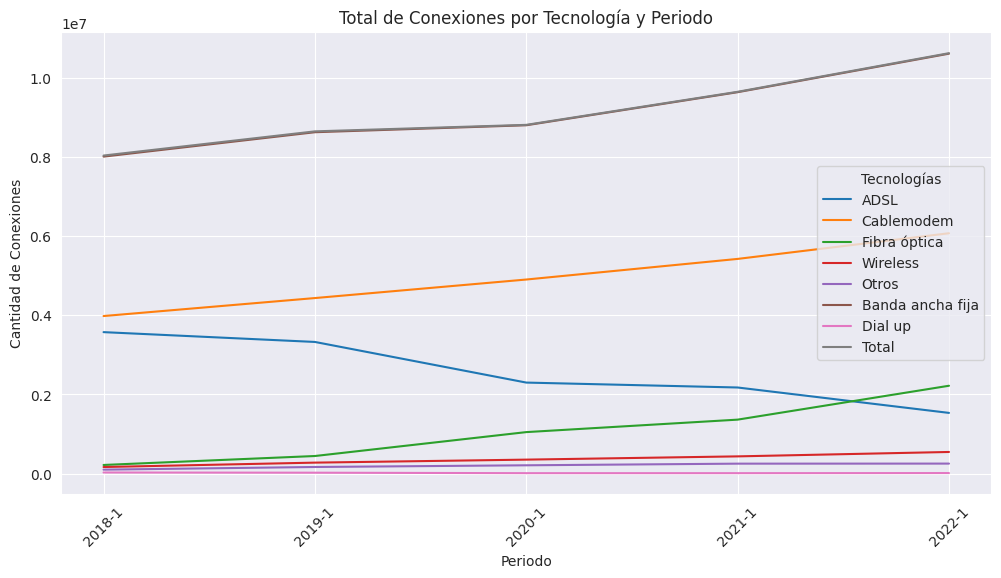

In [356]:
# Selecciono las columnas necesarias
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Banda ancha fija', 'Dial up', 'Total']
conexiones_totales_tecnologia_provincia = ['Año', 'Trimestre', 'Periodo'] + tecnologias

# Creo el nuevo DataFrame sumando los accesos por cada tecnología para todas las provincias
conexiones_totales_tecnologia_provincia = internet_prov_pri_Trim[conexiones_totales_tecnologia_provincia].groupby(['Año', 'Trimestre', 'Periodo']).sum().reset_index()

# Convierto el DataFrame en un formato largo para poder utilizar 'hue' en el gráfico de líneas
conexiones_totales_tecnologia_provincia = pd.melt(conexiones_totales_tecnologia_provincia, id_vars=['Año', "Trimestre", "Periodo"], var_name='Tecnologías', value_name='Cantidad de Conexiones')

# Creo el gráfico de líneas con 'hue' para los rangos de velocidad
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

sns.lineplot(data=conexiones_totales_tecnologia_provincia, x="Periodo", y='Cantidad de Conexiones', hue='Tecnologías')

# Establezco los títulos y etiquetas de los ejes
plt.title('Total de Conexiones por Tecnología y Periodo')
plt.xlabel('Periodo')
plt.ylabel('Cantidad de Conexiones')

# Roto las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Muestro el gráfico
plt.show()

* Genero un gráfico de líneas para evaluar el progreso de la mediana (representativa de las provincias) de conexiones a internet por tecnología y periodo:

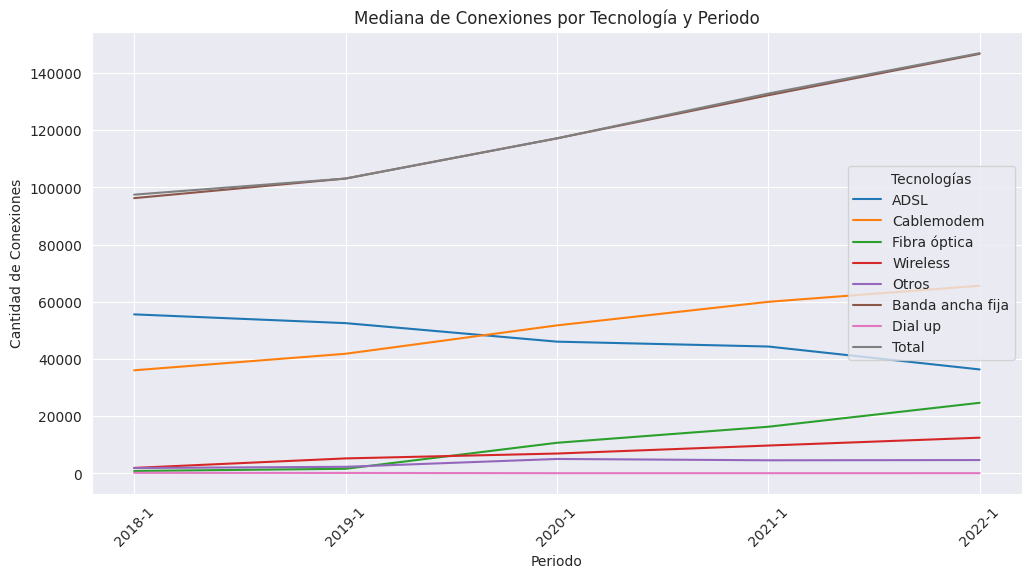

In [357]:
# Selecciono las columnas necesarias
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Banda ancha fija', 'Dial up', 'Total']
conexiones_totales_tecnologia_provincia = ['Año', 'Trimestre', 'Periodo'] + tecnologias

# Creo el nuevo DataFrame sumando los accesos por cada tecnología para todas las provincias
conexiones_totales_tecnologia_provincia = internet_prov_pri_Trim[conexiones_totales_tecnologia_provincia].groupby(['Año', 'Trimestre', 'Periodo']).median().reset_index()

# Convierto el DataFrame en un formato largo para poder utilizar 'hue' en el gráfico de líneas
conexiones_totales_tecnologia_provincia = pd.melt(conexiones_totales_tecnologia_provincia, id_vars=['Año', "Trimestre", "Periodo"], var_name='Tecnologías', value_name='Cantidad de Conexiones')

# Creo el gráfico de líneas con 'hue' para los rangos de velocidad
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

sns.lineplot(data=conexiones_totales_tecnologia_provincia, x="Periodo", y='Cantidad de Conexiones', hue='Tecnologías')

# Establezco los títulos y etiquetas de los ejes
plt.title('Mediana de Conexiones por Tecnología y Periodo')
plt.xlabel('Periodo')
plt.ylabel('Cantidad de Conexiones')

# Roto las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Muestro el gráfico
plt.show()

### Análisis de la evolución de conexiones por tecnología y periodo (primer trimestre del 2018-2022)

De lo anterior se desprende que:
* La tecnología prreminente respecto a otras tecnologías en los años más antiguos a la actualidad a nivel nacional (suma de conexiones - primer gráfico) ha sido *Cablemodem*; además, ésta se ha mantenido en alza en los último 4 años.
* Las conexiones totales de la tecnología *fibra óptica* era muy baja antes, pero ha ido aumentando hasta superar las conexiones totales de *ADSL*.
* Las conexiones totales de la tecnología *ADSL* ha venido en baja en los últimos años, y se aprecia la relación inversamente proporcional con *Fibra Óptica*.
* *Banda ancha fija* incluye muchas tecnologías no *Dial up*, y se puede observar que representa casi el total de las conexiones, ya que se superpone con la línea que representa al *total*. Esto quiere decir que casi el 100% de conexiones a nivel nacional son del tipo *Banda ancha*.
* *Dial up* (opuesto a *banda ancha*) se relaciona directamente con la categoría *Otros* ; auqnue no se superponen, se deduce que en *Otros* está incluida tecnologías del tipo *Dial up*.
* La tecnología *Wireless* presenta pocas conexiones totales y un ascenso lento en los útlimos años.

* En cuanto a la mediana (medida que representa a cada provincia), se observa que *Cablemodem* ha superado a *ADSL* y que existe una relación inversamente proporcional entre estas dos.
* *Fibra óptica viene en alza en los últimos años pero en relación a las provincias, aún no supera a *ADSL* como sí lo hace en las conexiones totales.
* La tecnología que mejor representa actualemnte a Argentina a nivel nacional y a nivel provincial es *Cablemodem*, siendo el segundo puesto aún disputado entre *ADSL* y *Fibra Óptica*. Sin embargo, de mantenerse la tendencia, se puede predecir que esta última ha habrá superado a la anterior en el 2023-1.

* Insight : al comparar los cruces de estos gráficos con los cruces del los gráficos de la evolución por rango de velocidad, se detecta una coincidencia en los mismos periodos 2019-4 y 2021-4.
> * El cruce de la mediana de accessos por rango de velocidad corresponde al cruce del total de accesos por tecnología, relacionádose directamente la velocidad de 1 a 6 mbps con la tecnología ADSL, y la velocidad +30mbps con la tecnología Fibra Óptica. Esto quiere decir  que la población que ha optado por velocidades más altas en cada provincia, ha dejado la tecnología ADLS y ha elegido Fibra Óptica, y esto ha repercutido en las conexiones totales de estas tecnologías.
> * El cruce del total de accesos por rango de velocidad coincide al cruce de la mediana de accesos por tecnología, relacionándose directamente la velocidad entre 1 a 6 mbps con la tecnología ADSL, y la velocidad +30mbps con la tecnología Cablemodem. Esto quiere decir que la población que ha optado por migrar de la tecnología ADSL a Cable Módem en cada provincia ha repercutido en las conexiones totales en los rangos de velocidades correspondientes.

* En general, se deduce una "migración" desde la tecnología ADLS hacia, principalmente, Cablemodem y Fibra Óptica, lo cual repercute directamente en el aumento de la mejora de velocidad de internet.

* Conviene revisar las provincias con el menor porcentaje actual (último trimestre) de conexiones respecto a sus conexiones totales en estas tecnologías:


## Situación actual de las conexiones por tecnología y provincia

Debo normalizar las columna "Provincia" para luego relacionarlas con su población.

In [358]:
# Reemplazo las letras "í" con tilde por la letra "i" sin tilde en la columna 'Provincia'del df conexiones_totales_provincia:
internet_prov_pri_Trim['Provincia'] = internet_prov_pri_Trim['Provincia'].str.replace('í', 'i')
internet_prov_pri_Trim['Provincia'] = internet_prov_pri_Trim['Provincia'].str.replace('ó', 'o')
internet_prov_pri_Trim['Provincia'] = internet_prov_pri_Trim['Provincia'].str.replace('é', 'e')
internet_prov_pri_Trim['Provincia'] = internet_prov_pri_Trim['Provincia'].str.replace('á', 'a')

internet_prov_pri_Trim.Provincia.value_counts()

Buenos Aires           5
Capital Federal        5
Tierra Del Fuego       5
Santiago Del Estero    5
Santa Fe               5
Santa Cruz             5
San Luis               5
San Juan               5
Salta                  5
Rio Negro              5
Neuquen                5
Misiones               5
Mendoza                5
La Rioja               5
La Pampa               5
Jujuy                  5
Formosa                5
Entre Rios             5
Corrientes             5
Cordoba                5
Chubut                 5
Chaco                  5
Catamarca              5
Tucuman                5
Name: Provincia, dtype: int64

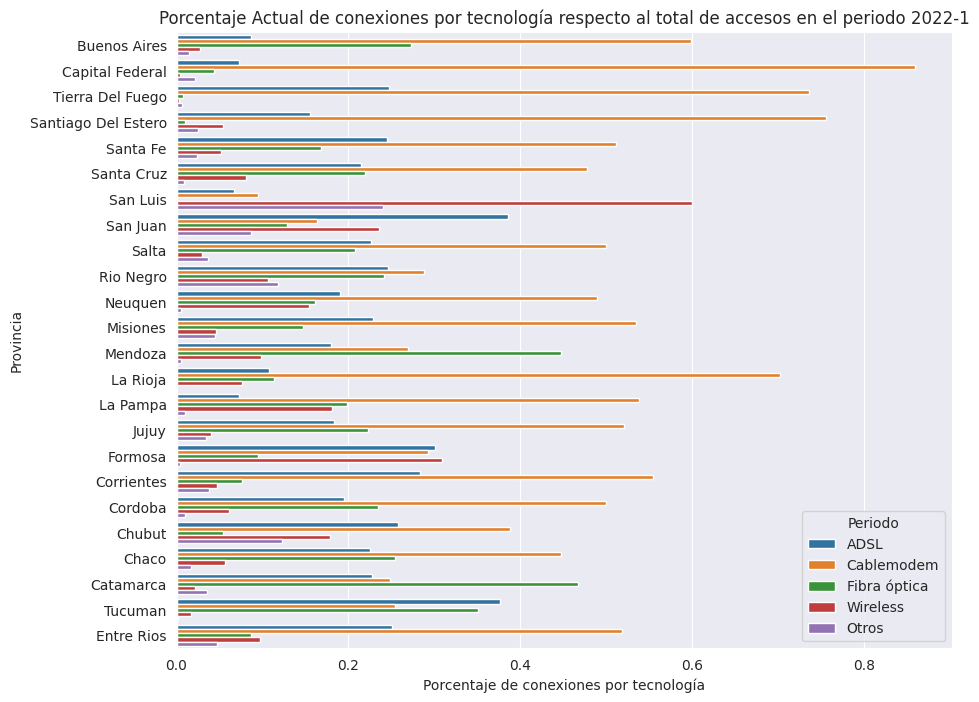

In [359]:
# Creo la columna "Periodo"
internet_prov_pri_Trim['Periodo'] = internet_prov_pri_Trim['Año'].astype(str) + '-' + internet_prov_pri_Trim['Trimestre'].astype(str)

internet_prov_pri_Trim_porc_total=internet_prov_pri_Trim[["Periodo", "Provincia", "ADSL", "Cablemodem", "Fibra óptica", "Wireless", "Otros", "Total"]]

# Obtengo el porcentaje de accesos de cada tecnología con respecto al total:
internet_prov_pri_Trim_porc_total["ADSL"]= internet_prov_pri_Trim["ADSL"]/internet_prov_pri_Trim["Total"]
internet_prov_pri_Trim_porc_total["Cablemodem"]= internet_prov_pri_Trim["Cablemodem"]/internet_prov_pri_Trim["Total"]
internet_prov_pri_Trim_porc_total["Fibra óptica"]= internet_prov_pri_Trim["Fibra óptica"]/internet_prov_pri_Trim["Total"]
internet_prov_pri_Trim_porc_total["Wireless"]= internet_prov_pri_Trim["Wireless"]/internet_prov_pri_Trim["Total"]
internet_prov_pri_Trim_porc_total["Otros"]= internet_prov_pri_Trim["Otros"]/internet_prov_pri_Trim["Total"]

# Convierto el DataFrame en un formato largo para poder utilizar 'hue' en el gráfico:
porc_largo = pd.melt(internet_prov_pri_Trim_porc_total, id_vars=['Periodo', "Provincia", "Total"], var_name='Tecnologias', value_name='Porcentaje de Conexiones')

#Filtro el dataframe por el último periodo:
internet_prov_pri_Trim_porc_total= porc_largo[porc_largo["Periodo"]== "2022-1"]

#Filtro el dataframe por el último periodo:
porc_largo_ultimo_trim= porc_largo[porc_largo["Periodo"]== "2022-1"]

# Creo una lista de las provincias por la cantidad total de conexiones en orden descendente
provincias_ordenadas = internet_prov_pri_Trim_porc_total.groupby('Provincia')['Porcentaje de Conexiones'].sum().sort_values(ascending=False).index.tolist()

# Crear el gráfico de barras con hue
plt.figure(figsize=(10, 8))
sns.barplot(x='Porcentaje de Conexiones', y='Provincia', hue='Tecnologias', data=porc_largo_ultimo_trim, order=provincias_ordenadas)

# Configuro las etiquetas
plt.xlabel('Porcentaje de conexiones por tecnología')
plt.ylabel('Provincia')
plt.title('Porcentaje Actual de conexiones por tecnología respecto al total de accesos en el periodo 2022-1')
plt.legend(title="Periodo")


# Mostrar el gráfico
plt.show()

### Análisis de la situación actual del porcentaje de conexiones por provincia y tecnología (2022-1)

* Se confirma la preponderancia de *Cablemodem* en la mayoría de provincias.
* Las provincias con menor porcentaje de conexiones por tecnología coinciden en su mayoría con las definidas en el primer KPI.
* San Luis no cuenta con la tecnología *Fibra Óptica*.
* En Mendoza y Catamarca ya prepondera la tecnología más rápida, *Fibra +Optica*.
* Si bien *Cablemodem* es la preponderante a nivel nacional y en la mayoría de provincias, hay algunas en las que todavía preponderan tecnologías que implican una menor velocidad de internet (*ADSL*, *Wireless*): San Luis, Tucumán, San Juan, Formoza, estando por debajo del 30% (de cada 10 conexiones , 3 son de Cablemodem).
* De acuerdo a lo anterior, las regiones San Luis, Tucumán, San Juan y Formoza son un foco al cual dirigir esfuerzos para mejorar la velocidad de internet. Esto se puede hacer enfocándonos en aumentar las conexiones de *Fibra Óptica* y *Cablemodem*; sin embargo, la primera muchas veces requiere mayores cambios en la infraestructura, por lo que es mucho más alcanzable y realista poner el foco en el aumento de conexiones de *Cablemodem*.
* Se debe analizar más de cerca el crecimiento porcentual de esta tecnología en estas regiones año a año, para definir mejor un posible KPI:

## Crecimiento porcentual anual de las conexiones Cablemodem en las provincias bajas

* Para visualizar la tendencia de crecimiento, grafico el crecimiento porcentual total entre el periodo 2018-1 y 2022-1 por provincia:

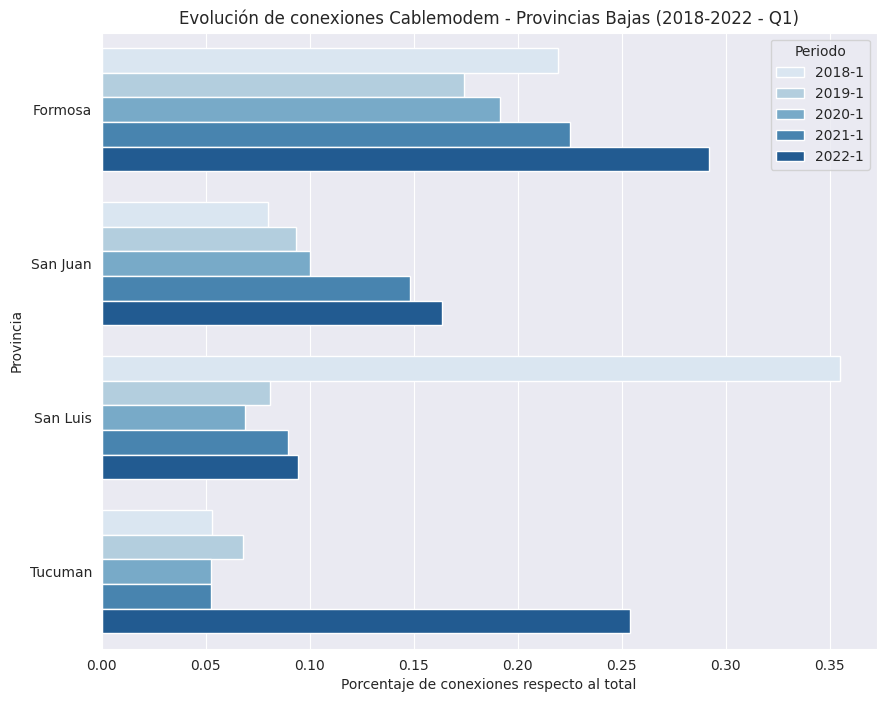

In [360]:
# Filtrar los datos para las provincias seleccionadas y la tecnología "Cablemodem"
provincias_seleccionadas = ['San Luis', 'Tucuman', 'San Juan', 'Formosa']

# Filtrar el DataFrame para incluir solo las provincias seleccionadas y la tecnología de interes
filtro = (porc_largo['Provincia'].isin(provincias_seleccionadas)) & (porc_largo['Tecnologias'] == 'Cablemodem')
datos_filtrados = porc_largo[filtro]

# Ordenar los períodos en orden ascendente
periodos_ordenados = sorted(datos_filtrados['Periodo'].unique())

# Crear el gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(data=datos_filtrados, y='Provincia', x="Porcentaje de Conexiones", hue='Periodo', orient='h', hue_order=periodos_ordenados, palette="Blues")

# Configurar las etiquetas
plt.xlabel('Porcentaje de conexiones respecto al total')
plt.ylabel('Provincia')
plt.title(f'Evolución de conexiones Cablemodem - Provincias Bajas (2018-2022 - Q1)')
plt.legend(title='Periodo')

# Mostrar el gráfico
plt.show()

Para visualizar la tendencia de crecimiento, grafico el crecimiento porcentual total entre el periodo 2018-1 y 2022-1 por provincia:

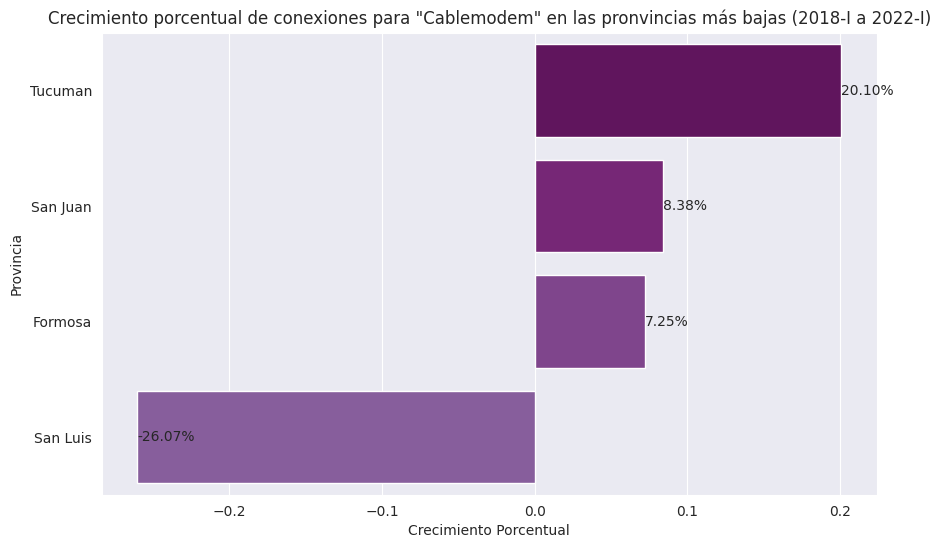

In [361]:
# Pivoteo la tabla
df_pivot = datos_filtrados.pivot(index='Provincia', columns='Periodo', values='Porcentaje de Conexiones')

# Calculo el crecimiento porcentual
df_pivot['Crecimiento'] = df_pivot['2022-1'] - df_pivot['2018-1']

# Ordeno por el crecimiento de forma descendente
df_pivot.sort_values('Crecimiento', ascending=False, inplace=True)

# Creao una paleta de colores personalizada
colores = sns.color_palette("BuPu", n_colors=12)[::-1]  # Ajusta el número de colores según tu preferencia

# Creo el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Crecimiento', y=df_pivot.index, data=df_pivot, orient='h', palette=colores)

# Configuro las etiquetas
plt.xlabel('Crecimiento Porcentual')
plt.ylabel('Provincia')
plt.title('Crecimiento porcentual de conexiones para "Cablemodem" en las pronvincias más bajas (2018-I a 2022-I)')

# Muestro los valores en cada barra
for i, value in enumerate(df_pivot['Crecimiento']):
    plt.text(value, i, f'{value*100:.2f}%', ha='left', va='center')

plt.show()

In [362]:
# REviso los porcentajes actuales
kpi2_data = df_pivot

kpi2_data

Periodo,2018-1,2019-1,2020-1,2021-1,2022-1,Crecimiento
Provincia,,,,,,
Tucuman,0.053083,0.067848,0.052452,0.052541,0.254072,0.200989
San Juan,0.080104,0.093490,0.100388,0.148070,0.163862,0.083758
Formosa,0.219469,0.174250,0.191390,0.225151,0.291981,0.072512
San Luis,0.354926,0.080801,0.068854,0.089615,0.094256,-0.260670


* Calculo el promedio de crecimiento porcentual:

In [363]:
df_pivot["Crecimiento"].mean()*100

2.4147172414021227

* Calculo la mediana de crecimiento porcentual:

In [364]:
df_pivot["Crecimiento"].median()*100

7.813511586001569

### Análisis del crecimiento porcentual de conexiones de la tecnología Cablemodem en las provincias Formosa, San Juan, San Luis y Tucumán

* De acuerdo al primer gráfico *Evolución de conexiones Cablemodem*, se desprende que la mayoría de las provincias (porcentaje menor al 40%) presentan un incremento porcentual año tras año en los últimos cuatro años. San Luis y Formoza presentaron un retroceso entre 2018 y 2019.
* Por otro lado, todas las provincias presentan un incremento porcentual entre el primer y último periodo evaluado (2018-1 a 2022-1), a excepción de San Luis.
* Todas las provincias, a excepción de San Luis, tienen al menos un salto evidente de crecimiento entre un periodo y otro.
* La provincia que más ha crecido en porcentaje de conexiones en Cablemodem en los últimos 4 años es Tucumán, teniendo un crecimiento del 20% (aproximadamente 5% anual).
* La provincia que menos crecimiento porcentual presenta en los últimos 4 años es San Luis , teniendo un decrecimiento de 26%.
* El promedio del crecimiento porcentual en los últimos 4 años es del 2.41% (aproximadamente 0.6% anual); sin embargo, este promedio está sesgado por el decrecimiento extremo de San Luis el el primer intervalo.
> * En San Luis el porcentaje de conexiones de Cablemodem respecto al total de conexiones decreció notoriamente del 2018 al 2019.
> * En este mismo intervalo de tiempo, se observa que aumentó considerablemente el número de conexiones totales (gráfico *Cantidad de conexiones por provincia*).
> * Además, en el gráfico *Porcentaje Actual de conexiones por tecnología* se observa que Wireless predomina en esta provincia con el 60% de todas las conexiones.
> * Se puede deducir que el descenco del porcentaje de Cablemodem se debe a que en el 2018 San Luis contaba con pocos accesos en general pero la mayoría era de esta tecnología; luego aumentó la cantidad de accesos notariamente pero estas fueron en otra tecnología (Wireless) por lo que el porcentaje de Cablemodem disminuyó considerablemente.
>> (Lo anterior se confirma con esta noticia del 2019 : [San Luis - líder en WiFi público](https://www.iprofesional.com/tecnologia/289227-mapa-del-wifi-argentino-la-ciudad-y-san-luis-lideran-los-accesos) )

* Ya que este decrecimiento en San Luis sesga el promedio de crecimiento porporcentual, la mediana proporciona un data más equilibrado de la realidad, siendo esta del 7.81% (casi 2% anual).



### **Conclusión**
A partir de lo anterior, propongo:
* Dirigir el enfoque en el aumento del porcentaje de conexiones *Cablemodem* para las provincias San Luis, Tucumán, San Juan y Formosa (lo que repercute directamente en el aspecto "*calidad*" del objetivo general).
* Ya que la mediana de crecimiento porcentual es de 7.81% y hay periodos entre los cuales la mayoría de provincias han presentado al menos una pendiente alta de crecimiento entre un periodo y otro, defino un **aumento objetivo** del 10% en los próximos 4 años (2022 - 2026); es decir un **crecimiento del 2.5% anual**.

#### 💡 **KPI**: *Aumento del porcentaje de conexiones Cablemodem por conexiones totales*

> Incrementar en 2.5% anual las conexiones en la tecnología Cablemodem en  San Luis, Tucumán, San Juan y Formoza en los próximos cuatro años.

> > * Métrica: aumento en el número de conexiones Cablemodem dividido por las conexiones totales de cada provincia, expresado en porcentaje.

>> * Aspecto del objetivo general: calidad.

>> * Meta:

>>> 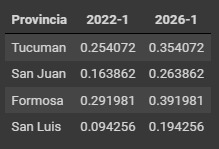


## DF *velocidad_media_provincia*

Ya que uno de los aspectos del objetivo general es la calidad de la conexión y ésta depende mucho de la velocidad de bajada, usaré un dataframe ya creado que contiene información sobre la velocidad media de bajada (en adelante "**vmb**") para cada provincia y periodo. Me quedaré solo con las columnas relevantes para examinar la evolución de la velocidad media.

In [365]:
# Selecciono las columnas relevantes:
velocidad_media_provincia = internet_prov_pri_Trim[["Año", "Trimestre", "Periodo", "Provincia", "Mbps (Media de bajada)"]]
velocidad_media_provincia

,Año,Trimestre,Periodo,Provincia,Mbps (Media de bajada)
0,2022,1,2022-1,Buenos Aires,63.0
1,2022,1,2022-1,Capital Federal,88.0
2,2022,1,2022-1,Catamarca,51.0
3,2022,1,2022-1,Chaco,46.0
4,2022,1,2022-1,Chubut,13.0
...,...,...,...,...,...
403,2018,1,2018-1,Santa Cruz,5.0
404,2018,1,2018-1,Santa Fe,11.0
405,2018,1,2018-1,Santiago Del Estero,6.0
406,2018,1,2018-1,Tierra Del Fuego,6.0


## Distribución de provincias respecto a la vmb 30mbps

* La FCC ha determinado que la velocidad de bajada a partir de la cual se considera la Banda Ancha y, por lo tanto, una conexión a internet de alta calidad es a partir de 25 mpbps. En esta [página](https://broadbandusa.ntia.doc.gov/about-us/frequently-asked-questions/how-fast-broadband#:~:text=The%20Federal%20Communications%20Commission%20) se puede encontrar información sobre esto. También este [artículo](https://espanol.verizon.com/articles/internet-speed-classifications/).
* Fijaré la velocidad en 30 mbps para salvaguardar cualquier falla de cobertura, ya que el dataframe provee un dato promedio de velocidad de bajada. En este sentido, debo revisar la cantidad de provincias que cumplen con esta condición:

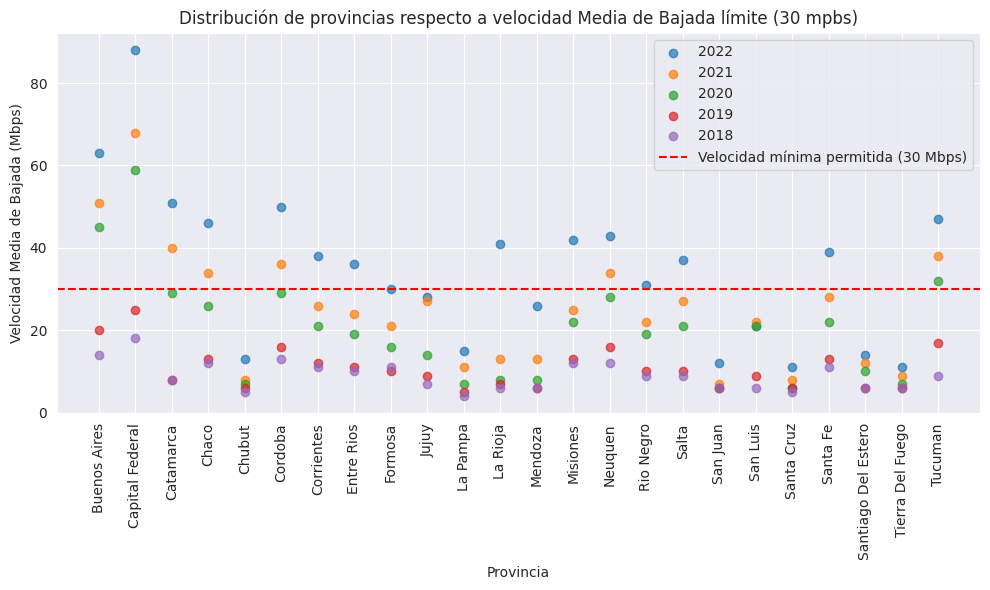

In [366]:
# Creao el gráfico
plt.figure(figsize=(10, 6))

for year in velocidad_media_provincia['Año'].unique():
    df_year = velocidad_media_provincia[velocidad_media_provincia['Año'] == year]
    plt.scatter(df_year['Provincia'], df_year['Mbps (Media de bajada)'], label=year, alpha =0.7)

# Establezco una línea que divida las provincias que se encuentran por encima y debajo de la velocidad establecida (30mbps)
plt.axhline(y=30, color='red', linestyle='--', label='Velocidad mínima permitida (30 Mbps)')

plt.xlabel('Provincia')
plt.ylabel('Velocidad Media de Bajada (Mbps)')
plt.title("Distribución de provincias respecto a velocidad Media de Bajada límite (30 mpbs)")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Análisis de la distribución de provincias respecto a la velocidad media límite (30 mbps)

* En los años 2018 y 2019 no hubo ni una sola provincia con vmb mayor o igual a 3 mbps.
* La mayoria de provincias en el año 2020 tuvieron una vmb menor a 30 mbps.
* La mayoría de provincias del año 2022 tuvieron una vmb superiores a 30 mbps.
* La vmb en las provincias Chubut, Jujuy, La Pampa, Mendoza, San Juan, San Luis, Santa Cruz, Santiago Del Estero y Tierra del Fuego ha estado siempre por debajo del límite de 30 mbps. Estas son 9 de un total de 24 provincias; esto representa a casi el 40% de provincias, lo cual refleja una situación de baja calidad de internet extendida en Argentina.
* De lo anterior, conviene revisar por año el porcentaje de provincias que sí cuentan con el mínimo de 30 mbps de  vmb, y ver cómo evoluciona este porcentaje de manera anual:

In [367]:
# Obtengo el número de provincias por año con velocidad mayor a 30 Mbps
provincias_con_velocidad_mayor_30 = velocidad_media_provincia[velocidad_media_provincia['Mbps (Media de bajada)'] >= 30].groupby('Año')['Provincia'].nunique()

# Calculo el porcentaje de provincias con velocidad mayor a 30 Mbps para cada año
total_provincias = 24  # Considerando que hay 24 provincias en total
porcentaje_provincias_mayor_30 = (provincias_con_velocidad_mayor_30 / total_provincias) * 100

# Creao una nueva columna en el DataFrame con los porcentajes calculados
velocidad_media_provincia['Porcentaje_Provincias_Mayor_30'] = velocidad_media_provincia['Año'].map(porcentaje_provincias_mayor_30)

# LLeno los nulos con 0 (años en los que el porcentaje haya sido nulo)
velocidad_media_provincia.fillna(0, inplace=True)

# Reviso
velocidad_media_provincia

,Año,Trimestre,Periodo,Provincia,Mbps (Media de bajada),Porcentaje_Provincias_Mayor_30
0,2022,1,2022-1,Buenos Aires,63.0,62.5
1,2022,1,2022-1,Capital Federal,88.0,62.5
2,2022,1,2022-1,Catamarca,51.0,62.5
3,2022,1,2022-1,Chaco,46.0,62.5
4,2022,1,2022-1,Chubut,13.0,62.5
...,...,...,...,...,...,...
403,2018,1,2018-1,Santa Cruz,5.0,0.0
404,2018,1,2018-1,Santa Fe,11.0,0.0
405,2018,1,2018-1,Santiago Del Estero,6.0,0.0
406,2018,1,2018-1,Tierra Del Fuego,6.0,0.0


## Crecimiento porcentual anual de provincias con vmb mayor a 30mbps

Creo un gráfico que me permita visualizar la evolución porcentual de por año de provincias con respecto al total que sí cuentan con vmb mayor a 30 mbps.

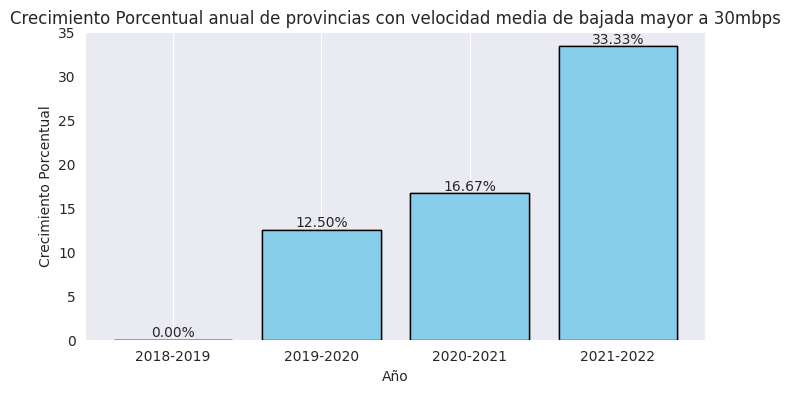

In [368]:
# Filtro los datos solo para las columnas 'Año' y 'Porcentaje_Provincias_Mayor_30'
data = velocidad_media_provincia[['Año', 'Porcentaje_Provincias_Mayor_30']].copy()

# Reordeno los años de manera ascendente:
data.sort_values("Año", inplace=True)

# Elimino las filas duplicadas basadas en la columna 'Año'
data = data.drop_duplicates(subset='Año')

# Calculo el crecimiento porcentual entre años consecutivos
data['Crecimiento_Porcentual'] = (data['Porcentaje_Provincias_Mayor_30'].shift(-1) - data['Porcentaje_Provincias_Mayor_30'])

# Elimino la última fila que contendría un NaN en la columna de crecimiento porcentual
data = data.dropna()

# Creo la columna "Intervalo_Tiempo"
data["Intervalo_Tiempo"]= data["Año"].astype(str) + "-" + (data["Año"]+1).astype(str)

# Creo el gráfico de barras para el crecimiento porcentual por año
plt.figure(figsize=(8, 4))
plt.bar(data['Intervalo_Tiempo'], data['Crecimiento_Porcentual'], color='skyblue', edgecolor='black')
plt.xlabel('Año')
plt.ylabel('Crecimiento Porcentual')
plt.title("Crecimiento Porcentual anual de provincias con velocidad media de bajada mayor a 30mbps")
plt.grid(axis='y')

# Creo el gráfico de barras y agrego los valores en las barras
bars = plt.bar(data['Intervalo_Tiempo'], data['Crecimiento_Porcentual'], color='skyblue', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')


plt.show()



* Obtengo el promedio del crecimiento porcentual:

In [369]:
data.Crecimiento_Porcentual.mean()

15.625

### Análisis del crecimiento porcentual anual de provincias con vmb mayor a 30mbps

* Se observa que el porcentaje de provincias con vmb mayor o igual a 30 mbps se ha incrementado considerablemente año a año:
> * En el 2018 ninguna provincia cumplía con la vmb estipulada.
> * En el 2019 el 12.5% de provincias superaron la vmb estipulada.
> * En el 2020 , el 29.17% de provincias superaron la vmb estipulada.
> * En el 2021, 62.5% de provincias cuentan con una vmb de al menos 30 mbps.
* Sin embargo, aún casi el 40% de provincias están por debajo de la vmb de 30 mbps, por lo que es importante poner el foco que aumentar este porcentaje, es decir, que más provincias superen el límite de velocidad establecido.
* Se observa también que el promedio de crecimiento porcentual es del 15.6% (4% trimestral aproximadamente).

### **Conclusión**
A partir de lo anterior, propongo:
* Dirigir el enfoque en el aumento del porcentaje de provincias que cuentan con una vmb de 30mbps.
* Ya que la media de crecimiento porcentual es de casi el 16% anual y se puede observar un salto evidnete del crecimiento porcentual en los último dos años, defino un **aumento objetivo** del 20% en el próximo año (2023); es decir un **crecimiento del 5% trimestral**. En otras palabras, el porcentaje de provincias con vmb mínimo de 30mbps en el 2023 deberá ser de 82.50%.

#### 💡 **KPI**: *Aumento del porcentaje de provincias con una vmb mínima de 30 mbps*

> Incrementar en 20% el porcentaje de provincias con vmb de mínimo 30mbps para el año 2023; 5% trimestral.

> > * Métrica: Porcentaje actual de provincias con una velocidad mínima de 30 Mbps.

>> * Aspecto del objetivo general: calidad y alcance.

>> * Meta : 82.5% provincias.

## Exportación de dataframes finales

Exporto los dataframes a utilizar en el dashboard.

In [373]:
# En relación a KPI 1:
kpi1_data.to_csv('/content/drive/MyDrive/HENRY/PI_DA/POST_EDA_Datasets/kpi1_data.csv', index=True)
conexiones_totales_provincia.to_csv('/content/drive/MyDrive/HENRY/PI_DA/POST_EDA_Datasets/conexiones_totales_provincia.csv', index=False)
conexiones_totales_provincia_bajas.to_csv('/content/drive/MyDrive/HENRY/PI_DA/POST_EDA_Datasets/conexiones_totales_provincia_bajas.csv', index=False)

# En relación a KPI 2:
kpi2_data.to_csv('/content/drive/MyDrive/HENRY/PI_DA/POST_EDA_Datasets/kpi2_data.csv', index=True)
porc_largo.to_csv('/content/drive/MyDrive/HENRY/PI_DA/POST_EDA_Datasets/porc_largo.csv', index=False)

# En relación a KPI 3:
velocidad_media_provincia.to_csv('/content/drive/MyDrive/HENRY/PI_DA/POST_EDA_Datasets/velocidad_media_provincia.csv', index=False)
